In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score
import numpy as np

# Cargar datos
df = pd.read_excel("./datos/Clasificación_Robertuito_2019.xlsx")
df2 = pd.read_excel("./datos/Clasificación_Robertuito_2020.xlsx")


In [151]:
true_col = 'Polarity'

robertuito_col = "Polarity_Robertuito"

labels=["NEG", "NEU", "POS"]

In [ ]:
def plot_confusion_matrices(df, true_col, robertuito_col):
    filtered_df = df[[true_col, robertuito_col]].dropna()
    labels=["NEG", "NEU", "POS"]
    # Generar matriz de confusión
    cm = confusion_matrix(filtered_df[true_col], filtered_df[robertuito_col], )
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=labels)

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='.2f')
    if df is df2:
        plt.title('Matriz de confusión 2020 - RoBERTuito (%)')
    else:
        plt.title('Matriz de confusión 2019- RoBERTuito (%)')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.tight_layout()
    plt.show()

In [155]:
def calcular_metricas_por_clase(df, true_col, pred_col, labels):
    resultados = []
    for label in labels:
        tp = ((df[true_col] == label) & (df[pred_col] == label)).sum()
        tn = ((df[true_col] != label) & (df[pred_col] != label)).sum()
        fp = ((df[true_col] != label) & (df[pred_col] == label)).sum()
        fn = ((df[true_col] == label) & (df[pred_col] != label)).sum()

        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        resultados.append({
            "Clase": label,
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1-score": round(f1, 4)
        })
    return pd.DataFrame(resultados).set_index("Clase")

In [156]:
def global_metrics(df, true_col, pred_col):
    # Eliminar filas con valores nulos
    filtered_df = df[[true_col, pred_col]].dropna()
    y_true = filtered_df[true_col]
    y_pred = filtered_df[pred_col]

    # Calcular métricas globales
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("=== MÉTRICAS GLOBALES ===")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}")

<Figure size 800x600 with 0 Axes>

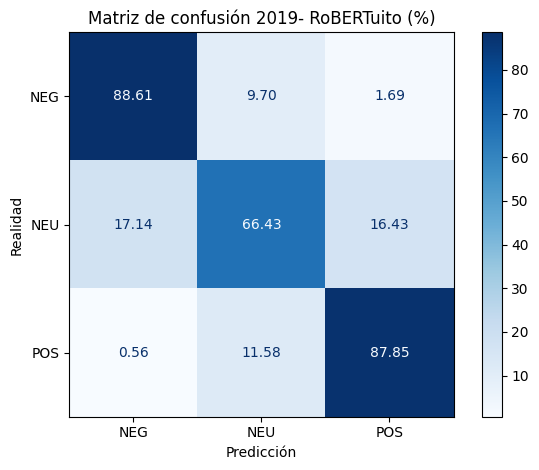

<Figure size 800x600 with 0 Axes>

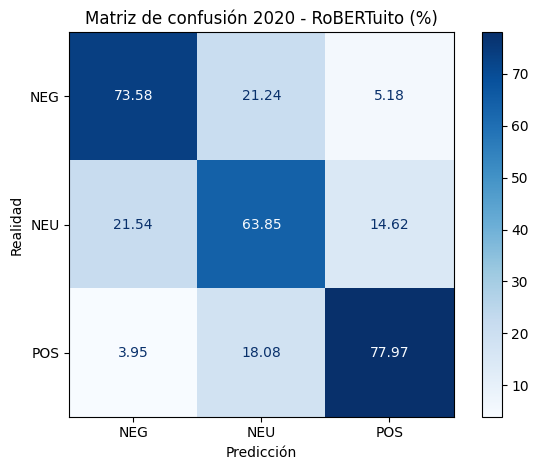

In [158]:
plot_confusion_matrices(df, true_col, robertuito_col)
plot_confusion_matrices(df2, true_col, robertuito_col)


In [160]:
calcular_metricas_por_clase(df, true_col, robertuito_col, labels)


,Accuracy,Precision,Recall,F1-score
Clase,,,,
NEG,0.9174,0.9417,0.8861,0.9130
NEU,0.8616,0.5167,0.6643,0.5812
POS,0.9236,0.9094,0.8785,0.8937


In [161]:
calcular_metricas_por_clase(df2, true_col, robertuito_col, labels)

,Accuracy,Precision,Recall,F1-score
Clase,,,,
NEG,0.828,0.8023,0.7358,0.7676
NEU,0.760,0.5321,0.6385,0.5804
POS,0.864,0.8263,0.7797,0.8023


In [162]:
global_metrics(df, 'Polarity', 'Polarity_Robertuito')
global_metrics(df2, 'Polarity', 'Polarity_Robertuito')


=== MÉTRICAS GLOBALES ===
Accuracy  : 0.8512
Precision : 0.7892
Recall    : 0.8096
F1-score  : 0.7960
=== MÉTRICAS GLOBALES ===
Accuracy  : 0.7260
Precision : 0.7202
Recall    : 0.7180
F1-score  : 0.7168
